# Bike Sharing Demand Prediction




#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


The steps we will follow in the exercise are as follows:
1. Reading understanding and visualizing the data
2. Prepairing the data for modelling(train-test split, rescaling etc.)
3. Training the model
4. Residual analysis
5. Prediction and evaluation on test set

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import calendar
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from math import sqrt



In [2]:
# Suppress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the 'day.csv' 

df_bikes = pd.read_csv('day.csv')

df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Step 1 . Data Understanding and Exploration

In [5]:
# Check data types of columns
df_bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

We can see that all the datatypes are in accurate type.

In [6]:
# Checking for the missing values

df_bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

As we can see there are no null values so no need to treat null values.

In [7]:
# Check the statistical desciption of numerical columns of dataframe

df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Check the dimensions of dataframe

df_bikes.shape

(730, 16)

# 1.1 Understanding the data dictionary

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# 1.2 Encoding Categorical Variables

In [9]:

# First, we will convert 'season' to categorical string values

df_bikes['season'] = df_bikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [10]:
df_bikes['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
# Similarly, we will convert 'weathersit' to categorical string values

df_bikes['weathersit'] =df_bikes['weathersit'].map({1:'clear', 2:'mist', 3:'light', 4:'heavy'})

In [12]:
df_bikes['weathersit'].astype('category').value_counts()

clear    463
mist     246
light     21
Name: weathersit, dtype: int64

In [13]:
# year (0: 2018, 1:2019)
df_bikes['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [14]:
# A function has been created to map the actual numbers to categorical levels.
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})
df_bikes[['mnth']] = df_bikes[['mnth']].apply(object_map)

In [15]:
df_bikes['mnth'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [16]:
# Lastly, we will convert 'weekday' to categorical string values
df_bikes['weekday'] = df_bikes['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
df_bikes['weekday'].astype('category').value_counts()

Mon    105
Sat    105
Sun    105
Fri    104
Thu    104
Tue    104
Wed    103
Name: weekday, dtype: int64

# 1.3 Dropping unnecessary columns

- **`instant`**: This feature gives the index of records. For this, we can use the default index given in pandas dataframe.


- **`dteday`**: This feature gives the date of record. This information is redundant as there are two other features `mnth` (Month) and `yr` (Year)


- **`casual`** & **`registered`**: These two values give count of casual and registered users respectively. However, there is a column `cnt` containing sum of these two columns. As these two will not serve any purpose independently and the same information is already provided in column `cnt`, we drop them.

In [17]:
df_bikes.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


Inspect the various aspects of the bike dataframe

# Step2. Visualizing Numercial Data

## 2.1 Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 1080x720 with 0 Axes>

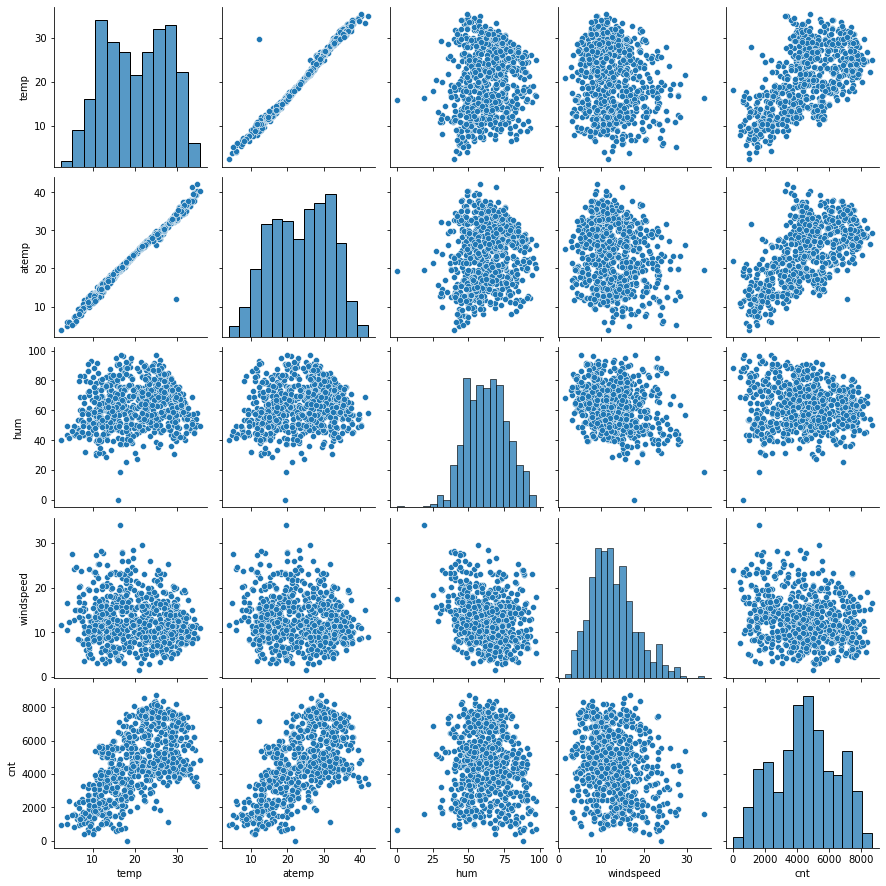

In [18]:
# Create a list of numerical variables only
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Visualise correlations among these numerical variables by plotting multiple scatter plots

plt.figure(figsize=(15,10))
sns.pairplot(df_bikes[numerical_vars])
plt.show()

#### Inferences : 

1) There is a big correlation between temp and atemp.
2) cnt and temp also have positive correlation.

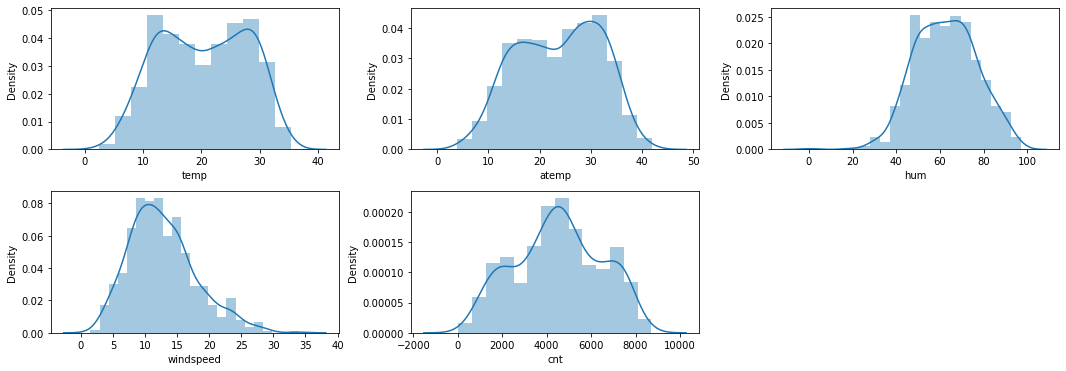

In [19]:
fig=plt.subplots(figsize=(15, 15))

for i, j in enumerate(["temp", "atemp", "hum", "windspeed",  "cnt"]):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.distplot(df_bikes[j])
    plt.tight_layout()

### Inferences :

- temp and atemp have similar distribution
- Humidity is most likely to be between 50-75 units
- Windspeed is most commonly seen between 8-12 units
- registered and cnt have similar distribution, as majority of the bikes are rented by registered customers

# 2.2 Visualizing Categorical Data

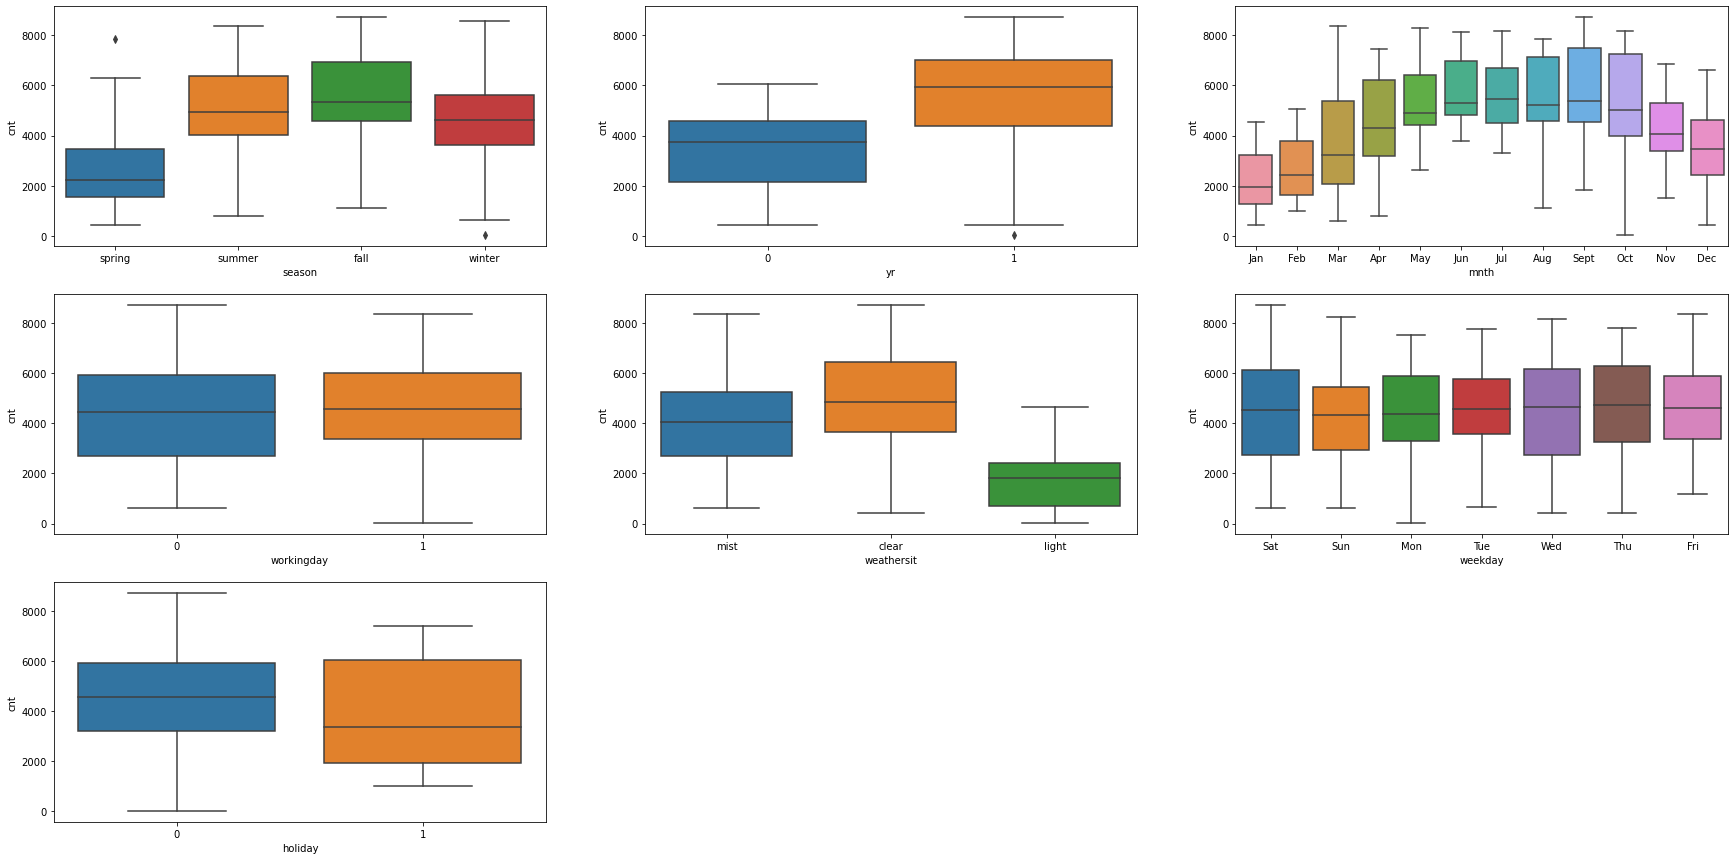

In [20]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data =df_bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bikes)
plt.show()

#### Inferences :

1. More bikes are rented on summer and fall season
2. More bikes rented in 2019
3. There were more demand in August, September and October month.The demand start increasing from March and than start decreasing after September month.
4. Holiday, workingday and weekday are not showing any specific pattern so hence these will not be used for any predictions
5. More bikes are rented in clear weather and no bike rented in heavy weather

# 2.3. Correlation among variables

In [21]:
cor = df_bikes.corr()
cor

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


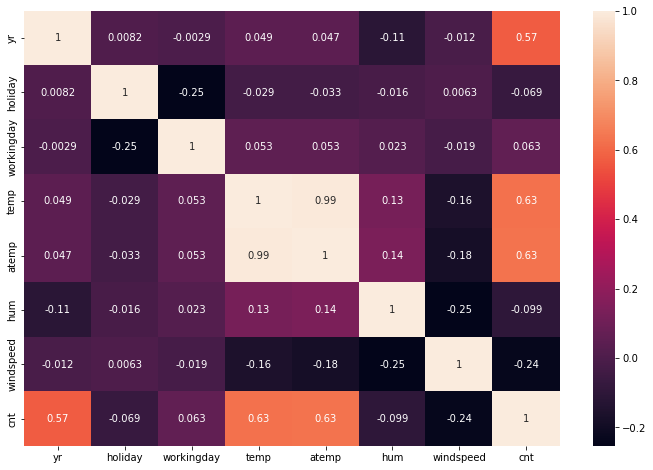

In [22]:
plt.figure(figsize = (12,8))
sns.heatmap(df_bikes.corr(), annot=True)
plt.show()

#### Inferences : 

1.cnt and temp have high correlation. ,
2.cnt has very low correlation with holiday, workingday and humidity.

# Step3. Creating Dummy Variables
- Creating dummy variables for season , mnth ,weathersit ,weekday
- Adding dummy variables to original dataset
- Dropping columns for which dummy variables were created

In [23]:
### creating dummy variables for season , mnth ,weathersit ,weekday
dummy =df_bikes[['season','mnth','weekday','weathersit']]
dummy = pd.get_dummies(dummy,drop_first=True )

## adding dummy variables to original dataset
df_bikes = pd.concat([dummy,df_bikes],axis = 1)

## dropping columns for which dummy variables were created
df_bikes.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

df_bikes.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_light,weathersit_mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
df_bikes.shape

(730, 30)

In [25]:
df_bikes.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_light', 'weathersit_mist', 'yr', 'holiday',
       'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# Step 4. Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [26]:
# Performing test-train split: Train set = 70% and Test set = 30%
train, test = train_test_split(df_bikes, train_size = 0.7, random_state = 100)

In [27]:
# See the dimensions of our train set and test set

print(train.shape)
print(test.shape)

(510, 30)
(220, 30)


# Step5. Scaling all the numerical columns

In [28]:
scaler = MinMaxScaler()

num_vars = ['cnt','hum','windspeed','temp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [29]:
train.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_light,weathersit_mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,33.1448,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,20.6746,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,11.5850,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,18.8752,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.345824,16.0977,0.751824,0.380981,0.191095


In [30]:
train.describe()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_light,weathersit_mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,23.500287,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,8.090963,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,16.603063,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,24.131150,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,30.177700,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,1.000000


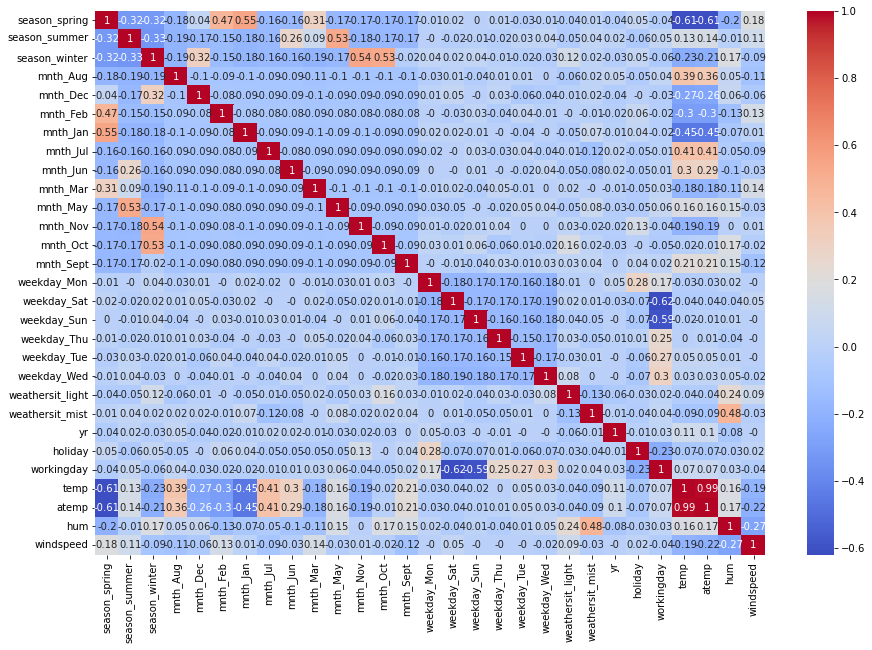

In [73]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (15, 10))
sns.heatmap(round(train.corr(), 2), annot = True, cmap="coolwarm")
plt.show()

#### Inferences :

From above heatmap, we observe that 'cnt' is highly correlated with 'yr', 'temp' and 'season_spring'

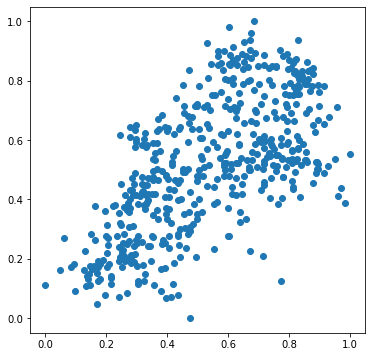

In [32]:
# Scatter plots of 'cnt' v/s 'temp'
plt.figure(figsize=[6,6])
plt.scatter(train.temp,train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [33]:
y_train = train.pop('cnt')
X_train = train

## Step 6: Building a linear model

Fit a regression line through the training data using `statsmodels`. In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [34]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [35]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 10),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 11),
 ('weathersit_light', True, 1),
 ('weathersit_mist', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 15),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [36]:
X_train.columns[rfe.support_]

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sept', 'weekday_Sat', 'weathersit_light',
       'weathersit_mist', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

<b>The above mentioned columns have been selected by RFE. So, we will start with these columns and use manual elimination approach
on them to have better model.</b>

<b>During our manual elimination process we have followed below steps iteratively:</b>
- Creating a dataframe with RFE selected variables
- Adding a constant variable
- Create a fitted model
- Check the parameters, summary and VIF(for for multicollinearity)
- Remove variable based on the p-Value(should be < 0.05) and VIF (should be <5)
- Reteat the process until we get a perfect model.

# Model 1

In [37]:
col = X_train.columns[rfe.support_]
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

# Check the parameters obtained
pd.options.display.float_format = '{:.6f}'.format
lm.params

const               0.251893
season_spring      -0.050897
season_summer       0.050762
season_winter       0.093301
mnth_Jan           -0.034512
mnth_Jul           -0.052918
mnth_Sept           0.081395
weekday_Sat         0.053552
weathersit_light   -0.247464
weathersit_mist    -0.056318
yr                  0.230527
holiday            -0.058173
workingday          0.043335
temp                0.509619
hum                -0.156299
windspeed          -0.186259
dtype: float64

In [38]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          4.22e-191
Time:                        22:58:18   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2519      0.036  

In [39]:
# checking the VIFs for the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.600000
1,season_spring,5.080000
13,temp,3.890000
3,season_winter,3.590000
2,season_summer,2.650000
14,hum,1.910000
12,workingday,1.880000
7,weekday_Sat,1.780000
4,mnth_Jan,1.570000
9,weathersit_mist,1.570000


#### We generally want a VIF that is less than 5.
#### Also the p-value for the variable "mnth_Jan" is almost 0.05.
#### So there are clearly some variables we need to drop. Lets drop the variable and rebulid the model.

In [40]:
X_train_new = X_train_rfe.drop(["const"], axis = 1)

In [41]:
# checking the VIFs for the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,29.370000
12,temp,17.780000
11,workingday,5.310000
14,windspeed,4.730000
0,season_spring,4.530000
2,season_winter,3.460000
1,season_summer,2.850000
8,weathersit_mist,2.290000
9,yr,2.090000
6,weekday_Sat,1.980000


# Model 2

In [42]:
### dropping mnth_Jan from the model
X_train_new = X_train_new.drop(['mnth_Jan'], axis=1)

In [43]:
# Adding a constant variable
X_train_new = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_new).fit()

# Check the parameters obtained
pd.options.display.float_format = '{:.6f}'.format
lm.params

const               0.240163
season_spring      -0.055546
season_summer       0.053733
season_winter       0.099214
mnth_Jul           -0.054616
mnth_Sept           0.081983
weekday_Sat         0.053031
weathersit_light   -0.245009
weathersit_mist    -0.056344
yr                  0.229763
holiday            -0.059083
workingday          0.043033
temp                0.527708
hum                -0.161086
windspeed          -0.180875
dtype: float64

In [44]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          2.11e-191
Time:                        22:58:18   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2402      0.036  

In [45]:
# checking the VIFs for the model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.350000
1,season_spring,5.020000
12,temp,3.620000
3,season_winter,3.490000
2,season_summer,2.620000
13,hum,1.910000
11,workingday,1.880000
6,weekday_Sat,1.780000
8,weathersit_mist,1.570000
4,mnth_Jul,1.490000


In [46]:
### dropping const from the model
X_train_new = X_train_new.drop(["const"], axis = 1)

# checking the VIFs for the model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,hum,28.460000
11,temp,16.980000
10,workingday,5.280000
13,windspeed,4.720000
0,season_spring,4.240000
2,season_winter,3.420000
1,season_summer,2.850000
7,weathersit_mist,2.290000
8,yr,2.080000
5,weekday_Sat,1.970000


# Model 3

In [47]:
### dropping hum from the model
X_train_new = X_train_new.drop(['hum'], axis=1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()

# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.28e-188
Time:                        22:58:18   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1576      0.031  

In [48]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,6.970000
10,workingday,5.200000
12,windspeed,4.650000
0,season_spring,2.490000
1,season_summer,2.340000
8,yr,2.070000
2,season_winter,1.980000
5,weekday_Sat,1.960000
3,mnth_Jul,1.580000
7,weathersit_mist,1.570000


# Model 4

In [49]:
### dropping workingday from the model
X_train_new = X_train_new.drop(['workingday'], axis=1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()

# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.6
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.68e-186
Time:                        22:58:18   Log-Likelihood:                 500.38
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     497   BIC:                            -919.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1960      0.030  

###### weekday_Saturday has a high p value so we will remove it and re-build the model again

In [50]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.120000
11,windspeed,4.620000
1,season_summer,2.230000
0,season_spring,2.100000
8,yr,2.070000
2,season_winter,1.790000
3,mnth_Jul,1.580000
7,weathersit_mist,1.550000
4,mnth_Sept,1.340000
5,weekday_Sat,1.190000


# Model 5

In [51]:
### dropping weekday_Saturday from the model
X_train_new = X_train_new.drop(['weekday_Sat'], axis=1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()

# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          5.06e-187
Time:                        22:58:18   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1994      0.030  

In [52]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.090000
10,windspeed,4.600000
1,season_summer,2.230000
0,season_spring,2.080000
7,yr,2.070000
2,season_winter,1.780000
3,mnth_Jul,1.580000
6,weathersit_mist,1.550000
4,mnth_Sept,1.340000
5,weathersit_light,1.080000


This looks like an acceptable model. We will keep the <b>temp</b> variable even if its VIF is greater than 5, because during our EDA, we have seen that Temperature has a high correlation with the <b>cnt</b> variable[0.65 to be exact]. Thus as per business understanding, we finalize this model as the final model.

## Step 7: Residual Analysis of the train data and Validating the assumptions of Linear Regression

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [53]:
y_train_cnt = lm.predict(X_train_lm)

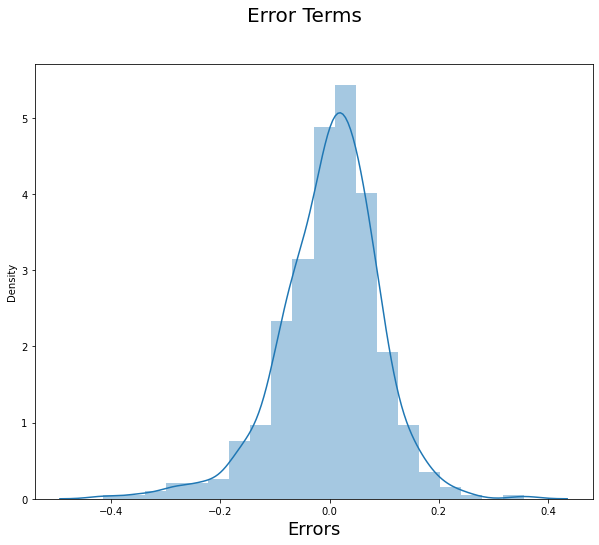

In [54]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(10,8))
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

We can clearly see that the residuals are following normal distribution

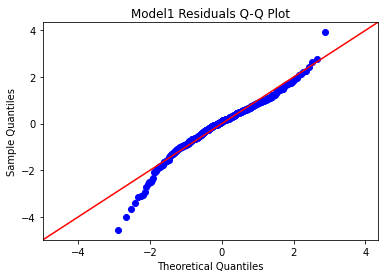

In [55]:
sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.title("Model1 Residuals Q-Q Plot")
plt.show()

### Validating the assumptions of Linear Regression
- Linear Relationship
- Homoscedasticity
- Absence of Multicollinearity
- Independence of residuals (absence of auto-correlation)
- Normality of Errors

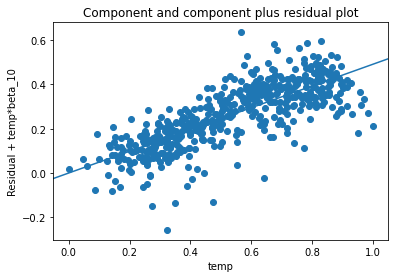

In [56]:
# Validating Linear Relationship

sm.graphics.plot_ccpr(lm, 'temp')
plt.show()

The partial residual plot represents the relationship between the predictor and the dependent variable while taking into account all the other variables. As we can see in the above graph, the linearity is well respected.

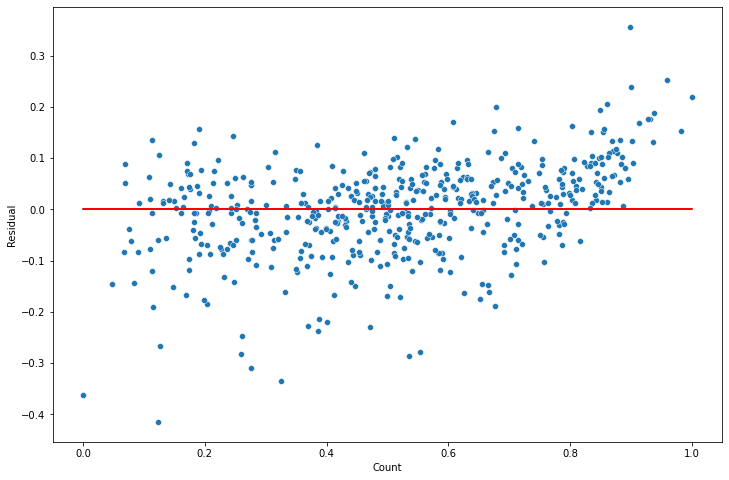

In [57]:
# Validating Homoscedasticity : The residuals have constant variance with respect to the dependent variable
plt.figure(figsize=(12,8))
y_train_pred = lm.predict(X_train_lm)
sns.scatterplot(y_train,(y_train - y_train_pred))
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

As we can see in the above plot, Homoscedasticity is well respected since the variance of the residuals are almost constant.

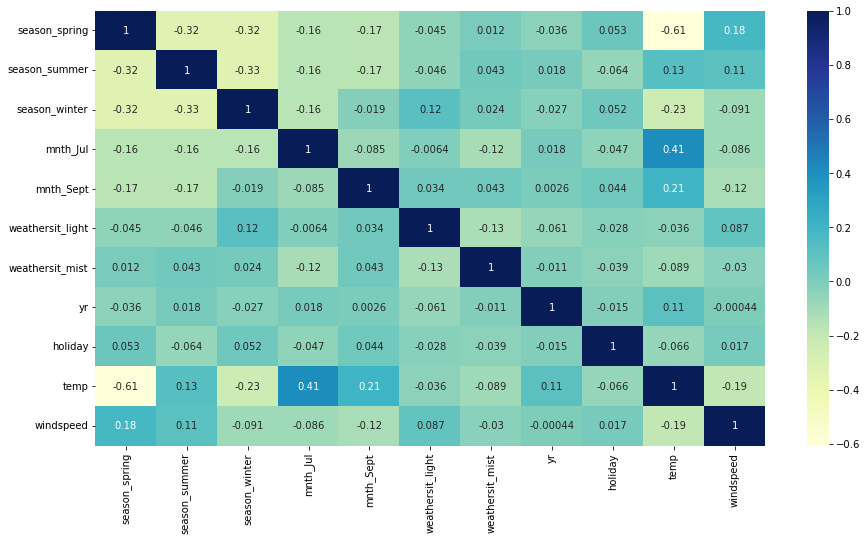

In [58]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),annot=True, cmap='YlGnBu')
plt.show()

All variables have less than 0.50 correlation with eachother. Checking the VIF now.

In [59]:
print(vif)

            Features      VIF
9               temp 5.090000
10         windspeed 4.600000
1      season_summer 2.230000
0      season_spring 2.080000
7                 yr 2.070000
2      season_winter 1.780000
3           mnth_Jul 1.580000
6    weathersit_mist 1.550000
4          mnth_Sept 1.340000
5   weathersit_light 1.080000
8            holiday 1.040000


Independence of residuals (absence of auto-correlation)
<br>Autocorrelation refers to the fact that observations’ errors are correlated
<br>To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. 
<br>The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables (0–2: positive auto-correlation, 2–4: negative auto-correlation)

In [60]:
print('The Durbin-Watson value for Model No.5 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Model No.5 is 2.0509


There is almost nill auto-correlation

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fifth model.

#### Applying the scaling on the test sets

In [61]:
num_vars = ['cnt','hum','windspeed','temp']
test[num_vars] = scaler.transform(test[num_vars])

In [62]:
test.describe()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_light,weathersit_mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,24.250312,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,8.281075,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,4.941955,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,17.090025,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,24.700000,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,31.124313,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,41.318550,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [63]:
y_test = test.pop('cnt')
X_test = test

In [64]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [65]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             220 non-null    float64
 1   season_spring     220 non-null    uint8  
 2   season_summer     220 non-null    uint8  
 3   season_winter     220 non-null    uint8  
 4   mnth_Jul          220 non-null    uint8  
 5   mnth_Sept         220 non-null    uint8  
 6   weathersit_light  220 non-null    uint8  
 7   weathersit_mist   220 non-null    uint8  
 8   yr                220 non-null    int64  
 9   holiday           220 non-null    int64  
 10  temp              220 non-null    float64
 11  windspeed         220 non-null    float64
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [66]:
# Making predictions
y_pred = lm.predict(X_test)

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.805268034904855

In [68]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.009310968608097107

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

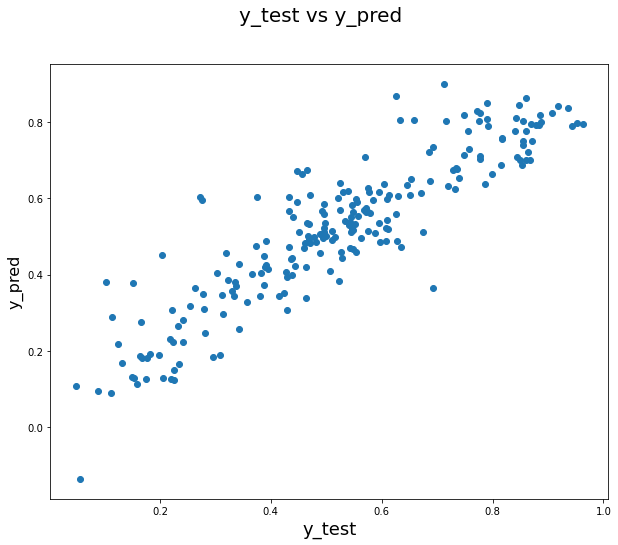

In [69]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [70]:
from sklearn.metrics import mean_absolute_error
print('The R-Squared score of the model for the predicted values is',round(r2_score(y_test, y_pred),2))
print('The Root Mean Squared Error of the model for the predicted values is',round(np.sqrt(mean_squared_error(y_test, y_pred)),4))
print('The Mean Absolute Error of the model for the predicted values is',mean_absolute_error(y_test, y_pred))

The R-Squared score of the model for the predicted values is 0.81
The Root Mean Squared Error of the model for the predicted values is 0.0965
The Mean Absolute Error of the model for the predicted values is 0.072404625614978


In [71]:
# As asked in problem statement
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.805268034904855

In [72]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
10,temp,0.490988
8,yr,0.233570
0,const,0.199434
3,season_winter,0.081741
5,mnth_Sept,0.076846
2,season_summer,0.046487
4,mnth_Jul,-0.052057
1,season_spring,-0.067169
7,weathersit_mist,-0.080167


We can see that the equation of our best fitted line is:

<b>cnt = 0.199434  + 0.490988 X temp + 0.233570 X yr + 0.081741 X season_Winter + 0.076846 X mnth_Sep + 0.046487 X season_summer   - 0.052057 X mnth_Jul - 0.067169 X season_ Spring - 0.080167 X weathersit_Mist & Cloudy - 0.097463 X holiday - 0.147919 X windspeed - 0.284199 X weathersit_Light Snow & Rain<b/>

# Summary 

1. The variables significant in predicting the demand for shared bikes are the ones having near to zero p-values:

   - `yr`: whether the year is 2018 or 2019
   - `holiday`: whether day is a holiday or not
   - `temp`: temperature in Celsius
   - `windspeed`: wind speed on a given day
   - `season_spring`: whether it is spring season or not
   - `season_winter`: whether it is winter season or not
   - `mnth_Jul`: whether it is month of Jul or not
   - `mnth_Sep`: whether it is month of September or not
   - `weathersit_light`: whether the weather is Light Snow / (Light Rain + Thunderstorm + Scattered clouds) or (Light Rain + Scattered clouds)


##### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.

##### All the negative coefficients  indicate that an increase in these values will lead to an decrease in the value of cnt.

- Temp is the most significant with the largest coefficient.
- Followed by weathersit_Light Snow & Rain.
- Bike rentals is more for the month of september
- The rentals reduce during holidays


This indicates that the bike rentals is majorly affected by temperature,season and month.